In [16]:
import numpy as np
import datetime as dt
import re

from rbamlib.models.mag import TS2005_S, TS2005_W
import matplotlib.pyplot as plt

In [17]:
TS_DAT=r"""
1997   1 17 50    4.32   -2.17    1.77  -405.4   -59.3   -29.2   5.13   46616.   -4.0    1    1 -0.2218   1.68   0.00   0.00   0.00   0.00   0.00   0.00
1997   1 17 55    4.38   -2.17    0.58  -416.5   -26.2   -27.5   4.52   94277.   -4.0    1    1 -0.2228   1.54   0.00   0.00   0.00   0.00   0.00   0.00
1997   1 18  0    4.11   -2.05    0.84  -428.3   -39.5   -13.0   5.47   79182.   -3.0    1    1 -0.2239   1.97   0.00   0.00   0.00   0.00   0.00   0.00
1997   1 18  5    4.13   -2.08    0.71  -414.5   -34.5   -24.4   4.08  128652.   -3.0    1    1 -0.2251   1.37   0.00   0.00   0.00   0.00   0.00   0.00
1997   1 18 10    4.16   -1.89    0.91  -423.1   -15.0   -12.6   4.31  130595.   -3.0    1    1 -0.2263   1.51   0.00   0.00   0.00   0.00   0.00   0.00
1997   1 18 15    4.65   -1.75    1.22  -423.5   -25.5   -15.8   4.79  129109.   -3.0    1    1 -0.2277   1.68   0.00   0.00   0.00   0.00   0.00   0.00
1997   1 18 20    4.76   -2.12    1.22  -423.1    -4.0     6.4   4.94  114159.   -3.0    1    1 -0.2291   1.72   0.00   0.00   0.00   0.00   0.00   0.00
1997   1 18 25    5.28   -2.16    1.29  -414.8   -18.2   -11.2   4.78  120416.   -3.0    1    1 -0.2306   1.60   0.00   0.00   0.00   0.00   0.00   0.00
1997   1 18 30    5.07   -2.33    1.38  -414.4   -42.8    -9.8   4.59   86624.   -4.0    1    1 -0.2321   1.55   0.00   0.00   0.00   0.00   0.00   0.00
1997   1 18 35    5.23   -2.30    0.93  -416.5   -45.7   -19.1   4.57  105116.   -4.0    1    1 -0.2338   1.57   0.00   0.00   0.00   0.00   0.00   0.00
1997   1 18 40    4.79   -2.01    0.65  -416.4   -24.4   -40.9   3.97   92907.   -4.0    1    1 -0.2355   1.35   0.00   0.00   0.00   0.00   0.00   0.00
1997   1 18 45    5.19   -2.11    0.73  -411.1   -37.8   -21.0   5.24  117168.   -4.0    1    1 -0.2373   1.74   0.00   0.00   0.00   0.00   0.00   0.00
1997   1 18 50    5.55   -1.82    1.23  -411.7   -27.0   -17.0   4.56  132855.   -4.0    1    1 -0.2391   1.51   0.00   0.00   0.00   0.00   0.00   0.00
1997   1 18 55    5.33   -2.26    1.45  -407.0   -32.0   -34.3   5.30   95297.   -4.0    1    1 -0.2411   1.73   0.00   0.00   0.00   0.00   0.00   0.00
1997   1 19  0    5.41   -2.91    1.23  -412.0   -35.5   -10.8   4.38  115424.   -3.0    1    1 -0.2431   1.46   0.00   0.00   0.00   0.00   0.00   0.00
1997   1 19  5    5.15   -2.35    0.98  -421.6   -43.6     4.5   5.03  145245.   -3.0    1    1 -0.2451   1.75   0.00   0.00   0.00   0.00   0.00   0.00
1997   1 19 10    5.39   -2.56    0.92  -428.4   -22.4    -3.3   5.25  136751.   -3.0    1    1 -0.2473   1.88   0.00   0.00   0.00   0.00   0.00   0.00
1997   1 19 15    5.61   -2.37    0.64  -425.4   -22.1   -21.8   6.78  130050.   -3.0    1    1 -0.2495   2.39   0.00   0.00   0.00   0.00   0.00   0.00
1997   1 19 20    5.77   -2.57    0.77  -419.8   -28.9   -14.4   5.34  150020.   -4.0    1    1 -0.2518   1.84   0.00   0.00   0.00   0.00   0.00   0.00
1997   1 19 25    5.30   -2.67    0.34  -422.2    -3.6     3.5   4.80  153475.   -4.0    1    1 -0.2541   1.66   0.00   0.00   0.00   0.00   0.00   0.00
1997   1 19 30    5.65   -2.81    1.14  -420.7   -28.1     0.7   4.26  109614.   -3.0    1    1 -0.2566   1.47   0.00   0.00   0.00   0.00   0.00   0.00
1997   1 19 35    6.15   -2.39    1.34  -409.0   -66.0     8.2   4.93   83916.   -2.0    1    1 -0.2590   1.64   0.00   0.00   0.00   0.00   0.00   0.00
1997   1 19 40    3.90   -4.02    0.65  -400.1   -32.2     8.0   7.42  156425.   -1.0    1    1 -0.2616   2.32   0.00   0.00   0.00   0.00   0.00   0.00
1997   1 19 45    4.35   -4.32    1.22  -396.1   -34.0   -10.0   7.81  161154.   -1.0    1    1 -0.2642   2.40   0.00   0.00   0.00   0.00   0.00   0.00
1997   1 19 50    0.39   -6.50   -2.05  -395.0   -26.3    -7.4   8.26  118906.   -2.0    1    1 -0.2669   2.51   0.02   0.03   0.00   0.02   0.07   0.10
1997   1 19 55   -0.37   -5.65   -2.08  -402.1   -35.9     4.2   7.63  122396.   -1.0    1    1 -0.2696   2.41   0.04   0.07   0.00   0.04   0.13   0.18
1997   1 20  0    3.08   -4.76    0.02  -407.9   -35.3    -3.5   6.46  125939.   -2.0    1    1 -0.2724   2.10   0.03   0.06   0.00   0.04   0.11   0.17
1997   1 20  5    4.73   -4.10    2.55  -420.2   -35.8   -12.8   5.96  133723.   -5.0    1    1 -0.2753   2.06   0.03   0.06   0.00   0.03   0.10   0.16
1997   1 20 10    5.19   -3.96    2.61  -417.9   -23.2    -7.5   5.73  212323.   -6.0    1    1 -0.2782   1.94   0.03   0.06   0.00   0.03   0.09   0.15
1997   1 20 15    6.66   -3.47    4.83  -411.8   -34.5     0.5   4.66  142485.   -6.0    1    1 -0.2811   1.54   0.03   0.05   0.00   0.03   0.09   0.14
1997   1 20 20    6.59   -1.66    4.32  -415.9   -21.8    -0.2   5.05  148727.   -7.0    1    2 -0.2842   1.70   0.03   0.05   0.00   0.03   0.08   0.13
1997   1 20 25    5.54   -1.03    3.30  -420.0    -9.1    -1.0   5.44  154967.   -9.0    1    1 -0.2872   1.86   0.03   0.05   0.00   0.03   0.07   0.12
1997   1 20 30    6.38   -1.12    2.99  -421.5   -15.7     2.4   5.09  145076.   -9.0    1    1 -0.2904   1.76   0.03   0.05   0.00   0.03   0.06   0.11
1997   1 20 35    5.98   -2.31    2.44  -415.9   -43.2     5.5   3.07   64470.   -9.0    1    1 -0.2935   1.04   0.03   0.04   0.00   0.03   0.06   0.10
1997   1 20 40    6.33   -2.11    2.52  -420.4   -39.5   -24.4   4.18  110487.   -8.0    1    1 -0.2968   1.45   0.03   0.04   0.00   0.02   0.05   0.10
1997   1 20 45    6.34   -2.06    2.66  -419.2   -38.0    -0.8   4.38  157018.   -8.0    1    1 -0.3000   1.51   0.03   0.04   0.00   0.02   0.05   0.09
1997   1 20 50    6.01   -2.53    2.66  -413.4   -32.6     6.9   4.99  103592.   -8.0    1    1 -0.3034   1.66   0.03   0.04   0.00   0.02   0.04   0.08
1997   1 20 55    5.80   -2.30    2.12  -406.9   -33.6    -2.3   5.31  132278.   -8.0    1    1 -0.3067   1.73   0.02   0.03   0.00   0.02   0.04   0.08
1997   1 21  0    5.40   -2.55    1.66  -414.8   -55.7     0.6   5.72   64268.   -7.0    1    1 -0.3101   1.95   0.02   0.03   0.00   0.02   0.04   0.07
1997   1 21  5    3.85   -2.57    0.77  -414.7   -41.3    -2.7   6.14  146512.   -6.0    1    1 -0.3136   2.07   0.02   0.03   0.00   0.02   0.03   0.07
1997   1 21 10    2.80   -3.31   -0.07  -411.5   -23.7     1.2   5.04  132075.   -5.0    1    1 -0.3171   1.66   0.02   0.03   0.00   0.02   0.04   0.07
1997   1 21 15   -1.23   -4.71   -2.17  -436.2   -23.6   -24.9   5.82  102967.   -4.0    1    1 -0.3206   2.16   0.04   0.06   0.00   0.04   0.10   0.15
1997   1 21 20   -1.34   -3.68   -2.67  -450.6   -24.8   -21.4   5.26   83034.   -3.0    1    1 -0.3242   2.08   0.06   0.09   0.00   0.06   0.17   0.23
1997   1 21 25   -0.15   -4.03   -2.75  -443.8   -37.1   -25.9   5.84   76283.   -2.0    1    1 -0.3278   2.25   0.08   0.12   0.01   0.09   0.24   0.31
1997   1 21 30   -0.56   -4.33   -2.36  -442.9   -26.1   -14.0   5.19   88354.   -2.0    1    1 -0.3315   1.98   0.10   0.15   0.01   0.11   0.29   0.36
1997   1 21 35    0.38   -4.66   -1.01  -441.3   -27.6   -16.6   4.92   76507.   -3.0    1    1 -0.3351   1.87   0.10   0.16   0.01   0.11   0.31   0.38
1997   1 21 40    2.68   -3.71    0.17  -426.6   -32.2    -3.9   4.25  120546.   -4.0    1    1 -0.3389   1.51   0.10   0.15   0.01   0.10   0.28   0.36
1997   1 21 45    3.84   -3.11    0.34  -401.9   -25.6    -8.1   4.61   62923.   -6.0    1    1 -0.3426   1.45   0.10   0.14   0.01   0.10   0.25   0.33
1997   1 21 50    4.13   -3.00    0.22  -405.5   -31.6    -8.0   5.12  101162.   -7.0    1    1 -0.3464   1.64   0.09   0.13   0.01   0.09   0.23   0.31
1997   1 21 55    4.21   -3.14    0.64  -405.0   -29.6   -23.1   4.75  146973.   -8.0    1    1 -0.3502   1.53   0.09   0.13   0.01   0.09   0.21   0.29
1997   1 22  0    4.58   -2.67    0.38  -415.1   -35.8   -12.7   6.20   81154.   -9.0    1    1 -0.3540   2.09   0.09   0.12   0.01   0.09   0.19   0.27
1997   1 22  5    4.72   -2.41    0.82  -415.0   -30.5   -12.4   4.84  114613.  -10.0    1    1 -0.3578   1.63   0.09   0.11   0.01   0.08   0.17   0.25
1997   1 22 10    4.67   -1.82    1.23  -408.3   -27.5    -6.7   5.03   96490.  -10.0    1    1 -0.3617   1.63   0.08   0.11   0.01   0.08   0.16   0.23
1997   1 22 15    4.67   -1.47    1.62  -407.0   -40.4     4.8   5.16   89953.  -10.0    1    1 -0.3656   1.68   0.08   0.10   0.01   0.07   0.14   0.22
1997   1 22 20    5.09   -1.08    1.75  -406.9   -32.9    -4.1   5.74  107027.  -11.0    1    1 -0.3695   1.86   0.08   0.10   0.01   0.07   0.13   0.20
1997   1 22 25    5.28   -1.32    1.93  -410.2   -37.5    -7.4   5.48  135199.  -11.0    1    1 -0.3734   1.80   0.07   0.09   0.01   0.07   0.12   0.19
1997   1 22 30    6.18    0.45    2.39  -400.3    14.8    10.2   5.54  145759.  -10.0    1    1 -0.3774   1.72   0.07   0.09   0.01   0.06   0.11   0.18
1997   1 22 35    5.71    0.23    2.08  -406.2    -6.3   -13.5   5.32  136128.  -10.0    1    1 -0.3813   1.70   0.07   0.08   0.01   0.06   0.10   0.17
1997   1 22 40    5.66    0.24    1.57  -399.8    12.0     3.2   5.41  135346.  -10.0    1    1 -0.3853   1.68   0.07   0.08   0.01   0.06   0.09   0.15
1997   1 22 45    5.44    0.50    1.46  -401.9    25.7    -4.4   4.84  149199.  -10.0    1    1 -0.3893   1.52   0.07   0.07   0.01   0.06   0.08   0.14
1997   1 22 50    5.60    0.12    1.51  -404.1    21.4    -1.1   4.70  135162.  -10.0    1    1 -0.3933   1.49   0.06   0.07   0.01   0.05   0.07   0.13
1997   1 22 55    6.16   -0.17    1.23  -425.7    -6.7   -13.6   3.19  181834.   -9.0    1    1 -0.3973   1.12   0.06   0.07   0.01   0.05   0.07   0.12
1997   1 23  0    6.04   -0.52    0.81  -423.0    -6.7    -8.6   3.15  186535.   -9.0    1    1 -0.4013   1.09   0.06   0.06   0.01   0.05   0.06   0.12
1997   1 23  5    5.04   -0.35    1.03  -410.2   -13.2    -0.1   5.10  241411.   -8.0    1    1 -0.4053   1.66   0.06   0.06   0.01   0.05   0.05   0.11
1997   1 23 10    4.85    0.40    1.06  -410.8    -9.2   -10.4   5.26  218412.   -7.0    1    1 -0.4093   1.72   0.06   0.06   0.01   0.04   0.05   0.10
1997   1 23 15    5.16    1.33    1.25  -412.5    -5.6   -14.3   4.50  202767.   -7.0    1    1 -0.4133   1.49   0.05   0.05   0.01   0.04   0.04   0.09
1997   1 23 20    4.83    1.04    1.40  -406.6     2.6    -2.1   5.50  181649.   -6.0    1    1 -0.4173   1.77   0.05   0.05   0.01   0.04   0.04   0.09
1997   1 23 25    4.97    0.90    1.26  -407.8   -13.1   -11.6   5.59  171123.   -7.0    1    1 -0.4213   1.80   0.05   0.05   0.01   0.04   0.04   0.08
1997   1 23 30    4.85    0.90    0.32  -409.6   -16.0    -7.7   5.33  168939.   -7.0    1    1 -0.4253   1.74   0.05   0.04   0.01   0.04   0.03   0.08
1997   1 23 35    4.48    0.78    0.69  -409.4    21.1     0.2   5.74  180744.   -6.0    1    1 -0.4292   1.87   0.05   0.04   0.01   0.03   0.03   0.07
1997   1 23 40    4.12    0.56    1.13  -413.7     5.7    -5.1   5.53  192819.   -7.0    1    1 -0.4332   1.84   0.05   0.04   0.01   0.03   0.03   0.07
1997   1 23 45    4.09    1.20    0.71  -408.2    24.2    10.9   5.66  216532.   -6.0    1    1 -0.4372   1.83   0.04   0.04   0.01   0.03   0.03   0.06
1997   1 23 50    3.98    1.14    0.37  -419.2    -0.6    -9.3   5.20  231437.   -6.0    1    1 -0.4411   1.77   0.04   0.04   0.01   0.03   0.02   0.06
1997   1 23 55    4.02    0.89   -0.09  -419.8    -2.7    -5.7   5.30  244996.   -7.0    1    1 -0.4450   1.81   0.04   0.04   0.01   0.03   0.03   0.07
"""

In [18]:
data_lines = [line for line in TS_DAT.split('\n') if re.match(r'\d+', line.strip())]
data_arr = np.loadtxt(data_lines, dtype=float, skiprows=1)

In [28]:
years, doy, hours, minutes = data_arr[:, [0, 1, 2, 3]].T
time = np.array(
        [dt.datetime(int(y), 1, 1) + dt.timedelta(days=int(d) - 1, hours=int(h), minutes=int(m)) for y, d, h, m in zip(years, doy, hours, minutes)])

# Extract relevant columns from data_arr
Wt = data_arr[:, -6:]  # Extract last 6 columns as Wt

# Extract parameters efficiently
By, Bz, SynH, Pdyn, Nsw = data_arr[:, [5, 6, 12, 16, 10]].T  # Unpack as separate 1D arrays

# Extract velocity components from the correct indices (7, 8, 9)
Vx, Vy, Vz = data_arr[:, 7:10].T  # Extract and transpose velocity components

# Compute solar wind speed
Vsw = np.sqrt(Vx**2 + Vy**2 + Vz**2)  # Element-wise operation

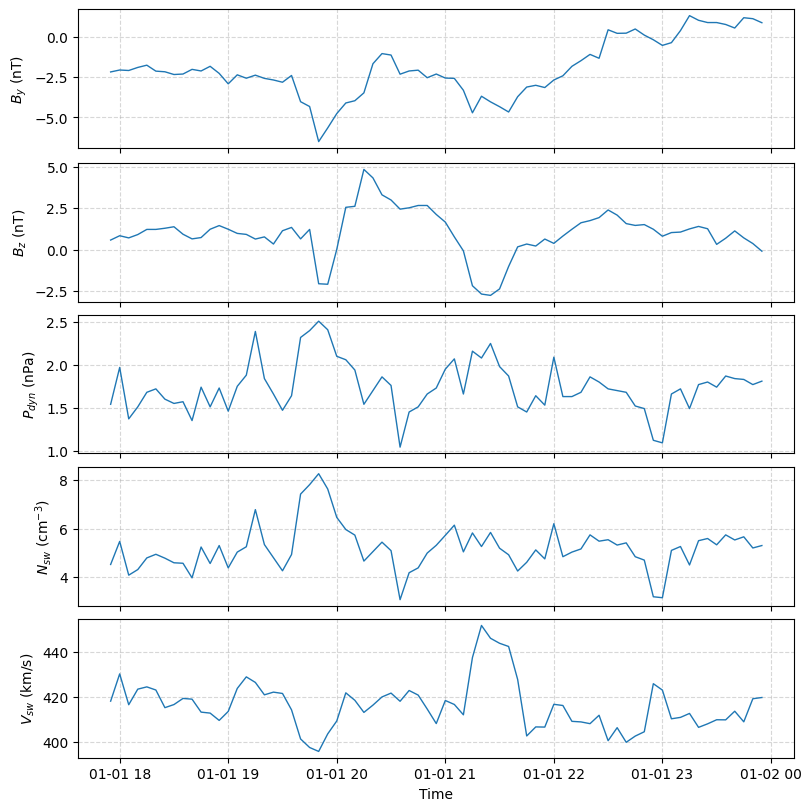

In [29]:
params = [By, Bz, Pdyn, Nsw, Vsw]
titles = [r'$B_y$ (nT)', r'$B_z$ (nT)', r'$P_{dyn}$ (nPa)', r'$N_{sw}$ (cm$^{-3}$)', r'$V_{sw}$ (km/s)']
# Create figure and subplots
fig, axs = plt.subplots(5, 1, figsize=(8, 8), sharex=True, constrained_layout=True)

# Plot each parameter
for ax, param, title in zip(axs, params, titles):
    ax.plot(time, param, lw=1)
    ax.set_ylabel(title, fontsize=10)
    ax.grid(True, linestyle="--", alpha=0.5)

# Only the last subplot gets an x-axis label
axs[-1].set_xlabel("Time", fontsize=10)

plt.show()

In [31]:
# 4) Compute source functions S => shape (N, 6)
S = TS2005_S(Nsw, Vsw, Bz, fillval=0.)

# 5) Compute W, resetting at each storm
# W = TS2005_W(time, S, storm_onsets=storms, fill_value=np.nan)
W = TS2005_W(time, S)
 

# Check some values
print('===rbamlib===')
print("W shape:", W.shape)
for i in range(6):
    print(f"W{i+1}, range: {np.nanmin(W[:,i]):.3f} to {np.nanmax(W[:,i]):.3f}, mean: {np.nanmean(W[:,i]):.3f}")
    
print('===Tsyganenko===')
print("W shape:", Wt.shape) 
# Check some values
for i in range(6):
    print(f"W{i+1}, range: {np.nanmin(Wt[:,i]):.3f} to {np.nanmax(Wt[:,i]):.3f}, mean: {np.nanmean(Wt[:,i]):.3f}")

===rbamlib===
W shape: (73, 6)
W1, range: 0.000 to 0.102, mean: 0.037
W2, range: 0.000 to 0.182, mean: 0.055
W3, range: 0.000 to 0.008, mean: 0.004
W4, range: 0.000 to 0.104, mean: 0.033
W5, range: 0.000 to 0.290, mean: 0.066
W6, range: 0.000 to 0.330, mean: 0.092
===Tsyganenko===
W shape: (73, 6)
W1, range: 0.000 to 0.100, mean: 0.037
W2, range: 0.000 to 0.160, mean: 0.049
W3, range: 0.000 to 0.010, mean: 0.004
W4, range: 0.000 to 0.110, mean: 0.034
W5, range: 0.000 to 0.310, mean: 0.070
W6, range: 0.000 to 0.380, mean: 0.108


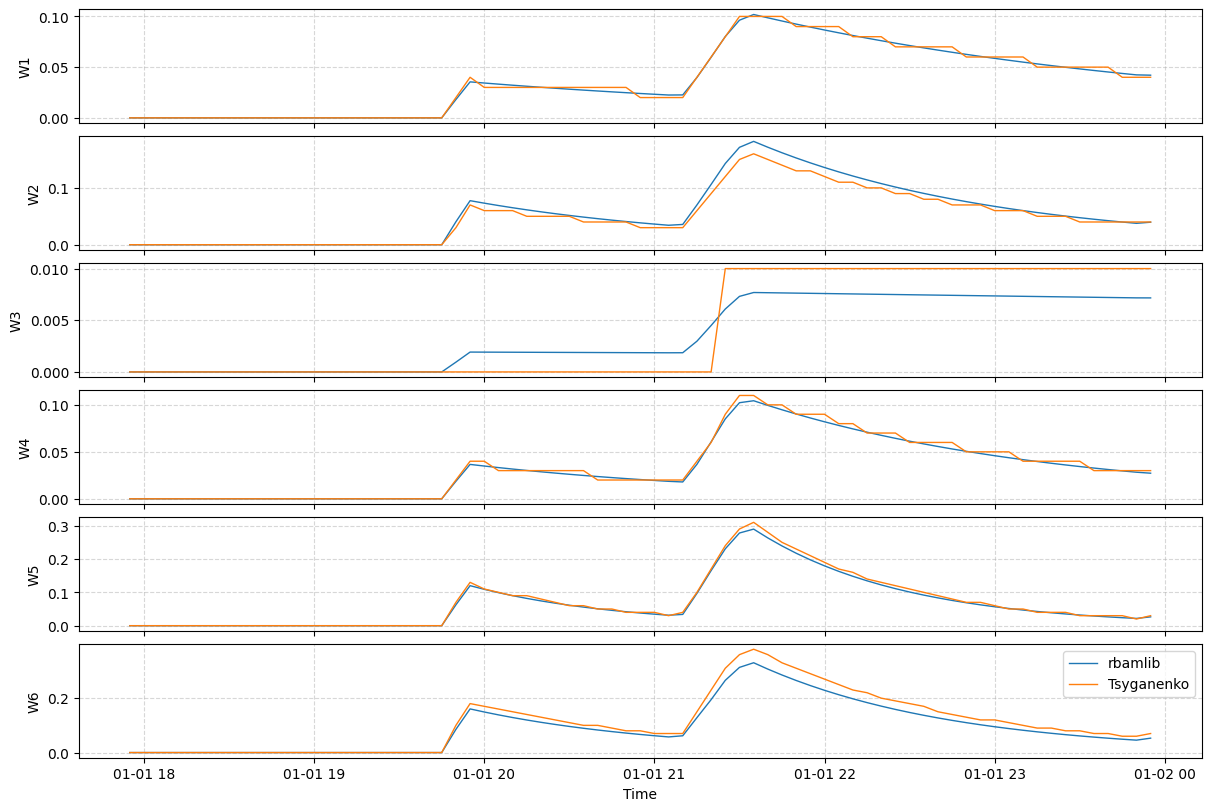

In [32]:
# Create figure and subplots
fig, axs = plt.subplots(6, 1, figsize=(12, 8), sharex=True, constrained_layout=True)
titles=['W1', 'W2', 'W3', 'W4', 'W5', 'W6']
# Plot each parameter
for i, (ax, title) in enumerate(zip(axs, titles)):
    ax.plot(time, W[:,i], lw=1, label='rbamlib')
    ax.plot(time, Wt[:,i], lw=1, label='Tsyganenko')
    ax.set_ylabel(title, fontsize=10)
    ax.grid(True, linestyle="--", alpha=0.5)

ax.legend()
# Only the last subplot gets an x-axis label
ax.set_xlabel("Time", fontsize=10)

plt.show()